
# (Ford GoBike System Data)

## (Ali Mohamed Attia)

### Table of Contents

Introduction
Data Wrangling
Univariate Exploration
Bivariate Exploration
Multivariate Exploration

## Introduction

This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

### Questions to be answered

When are most trips taken in terms
of time of day, day of the week, or
month of the year?

How long does the average trip take?

Does the above depend on if a user
is a subscriber or customer?

age   gender


### Data Wrangling

In [1]:
## importing all the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as ticker
import glob
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/201902-fordgobike-tripdata.csv")


At first let's explore the shape and contents of our data

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


This dataset contains bike trip data for certain amount of time, Each trip includes:

Trip duration (seconds)

Start time and date

End time and date

Start station id

Start station name

Start station latitude

Start station longitude

End station id

End station name

End station latitude

End station longitude

Bike id

User type (subscriber or customer)

Member birth year

Member gender	

Bike share for all trip

Each row represents a user’s trip.


Some columns data cannot be processed so we can remove It in Order to Start working on wrangled data

In [4]:
## remove unwanted columns
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude','bike_share_for_all_trip'], axis=1, inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        183412 non-null  int64  
 1   start_time          183412 non-null  object 
 2   end_time            183412 non-null  object 
 3   start_station_id    183215 non-null  float64
 4   start_station_name  183215 non-null  object 
 5   end_station_id      183215 non-null  float64
 6   end_station_name    183215 non-null  object 
 7   bike_id             183412 non-null  int64  
 8   user_type           183412 non-null  object 
 9   member_birth_year   175147 non-null  float64
 10  member_gender       175147 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 15.4+ MB


## Wrangling Steps

### add column for duration in minutes to be easily presented on charts

### make column for age

### Remove null values in birth year to calculate the age

### convert duration min from float to int

### seperate start time and end time into date column and time column

### convert member birth year into int

### seperate Days from start date to identify the weekdays with high frequency of using bikes


In [6]:
## add column for duration in minutes
df['duration_min']=df['duration_sec']/60
df['rounded_duration_min']=df.duration_min.round(1)

In [7]:
## Remove null values in birth year to calculate the age
df[df['member_birth_year'].isna()]
df.dropna(subset=['member_birth_year'],inplace=True)

In [8]:
## calculate the age
df['member_age']=2021-df['member_birth_year']
df['member_birth_year']=df['member_birth_year'].astype(int)
df['member_age']=df['member_age'].astype(int)


In [9]:
## seperate start time and end time into date column and time column
df['start_date'] = pd.to_datetime(df['start_time']).dt.date
df['start_time'] = pd.to_datetime(df['start_time']).dt.time

In [10]:
df['end_date'] = pd.to_datetime(df['end_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.time

In [11]:
## seperate Month from start date to identify the monthes and seasons with high frequency of using bikes
df['start_date'] =  pd.to_datetime(df['start_date'], format='%Y-%m-%d')
df['month'] = df['start_date'].apply(lambda r:r.month).astype(int)



In [12]:
## seperate Days from start date to identify the weekdays with high frequency of using bikes

df['day'] = df['start_date'].apply(lambda r:r.day).astype(int)
df['start_day'] = df.start_date.dt.strftime('%a')


Now let's explre the Final shape

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min,rounded_duration_min,member_age,start_date,end_date,month,day,start_day
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,869.750000,869.8,37,2019-02-28,2019-03-01,2,28,Thu
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,1030.900000,1030.9,49,2019-02-28,2019-03-01,2,28,Thu
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,608.166667,608.2,32,2019-02-28,2019-03-01,2,28,Thu
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,26.416667,26.4,47,2019-02-28,2019-03-01,2,28,Thu
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,29.883333,29.9,62,2019-02-28,2019-03-01,2,28,Thu


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   duration_sec          175147 non-null  int64         
 1   start_time            175147 non-null  object        
 2   end_time              175147 non-null  object        
 3   start_station_id      174952 non-null  float64       
 4   start_station_name    174952 non-null  object        
 5   end_station_id        174952 non-null  float64       
 6   end_station_name      174952 non-null  object        
 7   bike_id               175147 non-null  int64         
 8   user_type             175147 non-null  object        
 9   member_birth_year     175147 non-null  int32         
 10  member_gender         175147 non-null  object        
 11  duration_min          175147 non-null  float64       
 12  rounded_duration_min  175147 non-null  float64       
 13 


## Univariate Exploration¶


### Here we are going to navigate through data and make visualisation that  summarize only one variable at a time to deduce a useful results 

We are going to make histogram to get the relation between trip duration and frequency to identify the most common trip Durations

from exploring data in excel sheet we found that 

Maximum trip duration is 1424 minute

Minimum trip duration is 1 minute


Text(0, 0.5, 'Frequency')

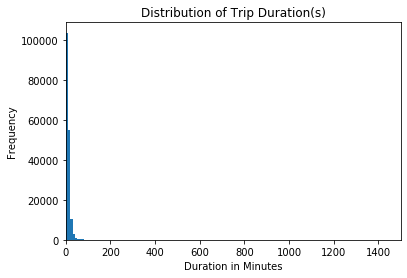

In [15]:
binedges = np.arange(0, df['rounded_duration_min'].max() + 10 , 10)
plt.hist(data = df , x = 'rounded_duration_min' , bins = binedges)
plt.xlim(0,1500)
plt.title('Distribution of Trip Duration(s)')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')

From this graph we find that most trips are from 1 minute to 50 
So we are going to make a new plot without outliers

Text(0, 0.5, 'Frequency')

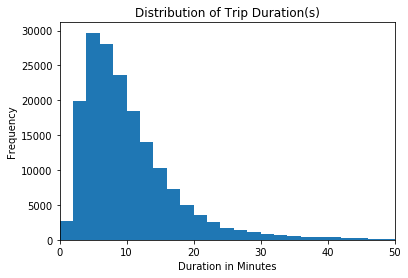

In [16]:
binedges = np.arange(0, df['rounded_duration_min'].max() + 2 , 2)
plt.hist(data = df , x = 'rounded_duration_min' , rwidth=20, bins = binedges)
plt.xlim(0,50)
plt.title('Distribution of Trip Duration(s)')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')

THE most frequent trips are from 2 minutes to 20 minutes
and The most is from 4 to 6 minutes with near 3000 trip per month

**How about identifing the most common category that use bikes 
is it the subscriber who are regeistered to the system or the customers who are new to the system

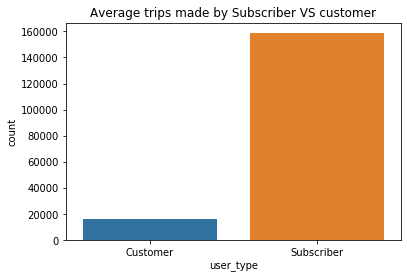

In [17]:
sb.countplot(data=df,x='user_type')
plt.title('Average trips made by Subscriber VS customer');


Subscriber clients are have the largest share of using bikeshare

** Identifing Relation between Clients age and Trips frequency

Text(0, 0.5, 'Frequency')

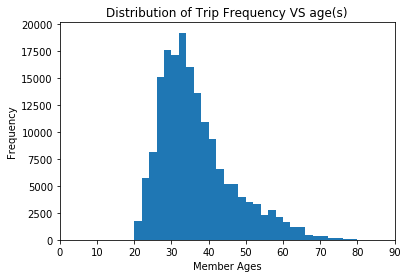

In [18]:

binedges = np.arange(0, df['member_age'].max() + 2 , 2)
plt.hist(data = df , x = 'member_age' , bins = binedges)
plt.xlim(0,90)
plt.title('Distribution of Trip Frequency VS age(s)')
plt.xlabel('Member Ages')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

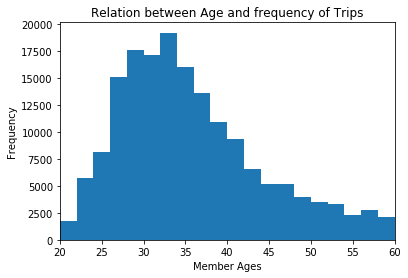

In [19]:
binedges = np.arange(0, df['member_age'].max() + 2 , 2)
plt.hist(data = df , x = 'member_age' , bins = binedges)
plt.xlim(20,60)
plt.title('Relation between Age and frequency of Trips')
plt.xlabel('Member Ages')
plt.ylabel('Frequency')

The most frequent segment is between 25 and 45
but there is also a non neglectable segment from 45 to 80

let's think about the top 10 locations from which the client start his trip

In [20]:
z = df.groupby(['start_station_name']).start_station_name.value_counts().nlargest(10)
print(z)

start_station_name                                         start_station_name                                       
Market St at 10th St                                       Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)  San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                         Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)           Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)               Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)             San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)         San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard S

We should increase the bikes located in these locations to avoid loss of clients

Text(0.5, 1.0, 'distribution of trips among the whole year')

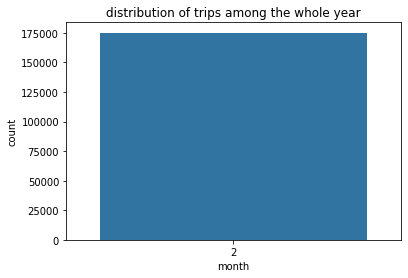

In [21]:
## distribution of trips among the whole year

sb.countplot(data=df,x='month', color=sb.color_palette()[0]);
plt.title('distribution of trips among the whole year')


It appeared that this data belong to only one month

Text(0.5, 1.0, 'distribution of trips among the weekdays')

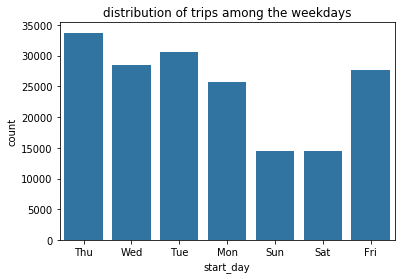

In [22]:
#### distribution of trips among the weekdays


sb.countplot(data=df,x='start_day', color=sb.color_palette()[0]);
plt.title('distribution of trips among the weekdays')


Bike rides decrease in saturday and sunday as they are holiday in most professions


## Bivariate Exploration¶


Does the age of User affect the distance of the trip

We are going to start with scatter plot

Text(0, 0.5, 'Trip duration(m)')

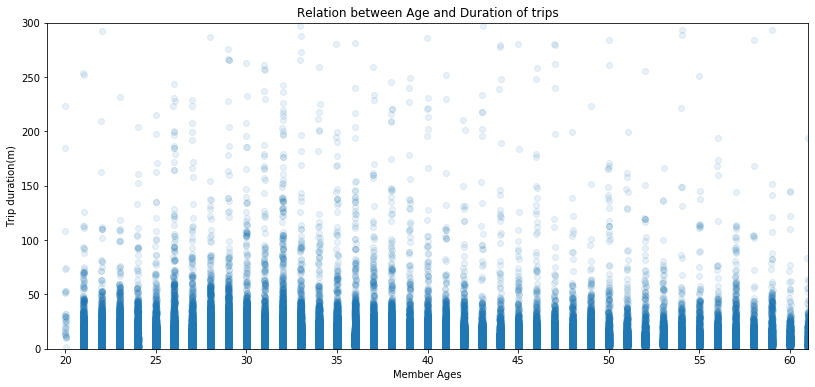

In [23]:
plt.figure(figsize=(30,6))

plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'member_age', y = 'rounded_duration_min', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)

plt.xlim(19,61);
plt.ylim(0,300);
plt.title('Relation between Age and Duration of trips')
plt.xlabel('Member Ages')
plt.ylabel('Trip duration(m)')



The most intense area is below 300 minutes

the heatmap will be more representable than scatterplot in this situation

Text(0, 0.5, 'Trip duration(m)')

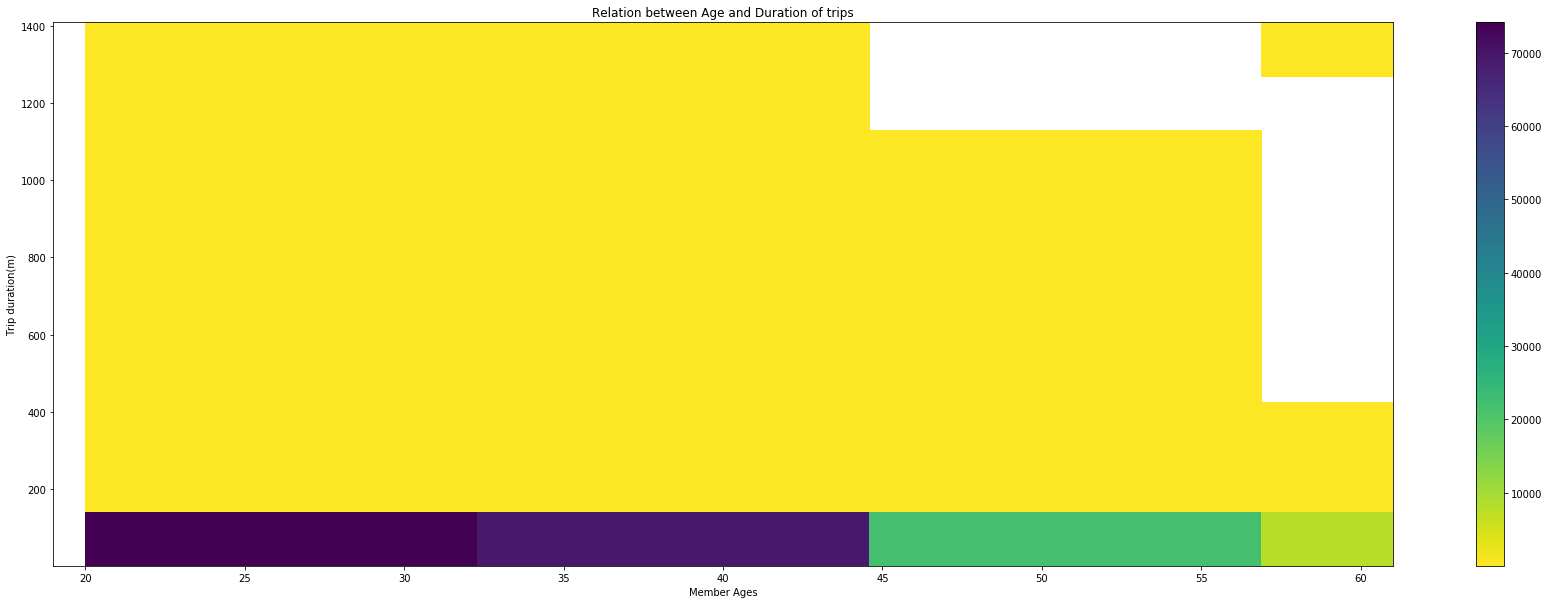

In [24]:
plt.figure(figsize=(30,10))

plt.hist2d(data = df, x = 'member_age', y = 'rounded_duration_min', cmin=0.5, cmap='viridis_r')
plt.xlim(19,61);
plt.colorbar()

plt.title('Relation between Age and Duration of trips')
plt.xlabel('Member Ages')
plt.ylabel('Trip duration(m)')

We are going to remove outliers and focus on the most intense area

Text(0, 0.5, 'Trip duration(m)')

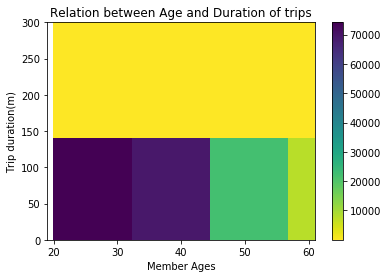

In [25]:
plt.hist2d(data = df, x = 'member_age', y = 'rounded_duration_min', cmin=0.2, cmap='viridis_r')
plt.xlim(19,61);
plt.colorbar()
plt.ylim(0,300);
plt.title('Relation between Age and Duration of trips')
plt.xlabel('Member Ages')
plt.ylabel('Trip duration(m)')



As the age increase the frequency and duration of trips decrease

**Relation between gender and Trip duration considering other factors

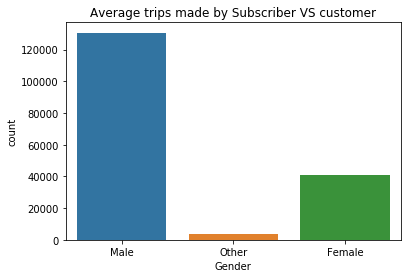

In [26]:
sb.countplot(data=df,x='member_gender')
plt.xlabel('Gender')


plt.title('Average trips made by Subscriber VS customer');

Male have more frequent trips with similar proportion to females and others

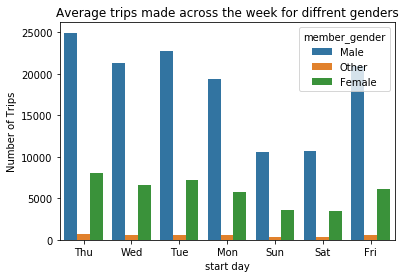

In [27]:
sb.countplot(data=df, x='start_day', hue='member_gender')
plt.xlabel('start day')
plt.ylabel('Number of Trips')
plt.title('Average trips made across the week for diffrent genders');

Males Use bikes more frequent than females

**The relation between the User type(Subscriber/Customer) and the time spended on the bike

<Figure size 576x576 with 0 Axes>

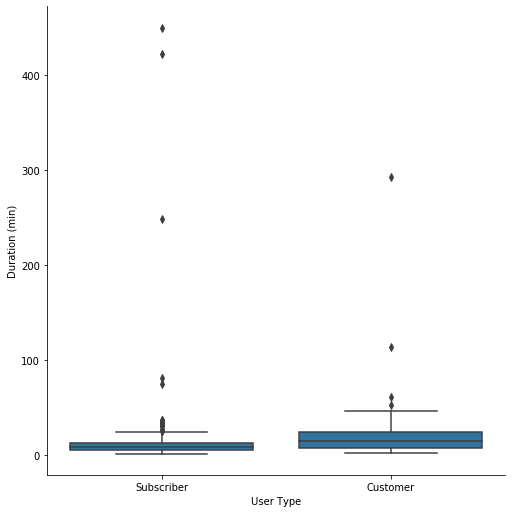

In [28]:
samples = np.random.choice(df.shape[0], 500, replace = False)
df_sample = df.reindex(samples)

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [8, 8])
x = sb.PairGrid(data = df_sample, y_vars = 'duration_min', x_vars = 'user_type',
                height = 7, aspect = 1)

x.map(boxgrid)
plt.ylabel('Duration (min)')
plt.xlabel('User Type')
plt.show();

The mean duration of trips is higher with customer
But Subscribers have more and wide range Durations

## Multivariate Exploration¶


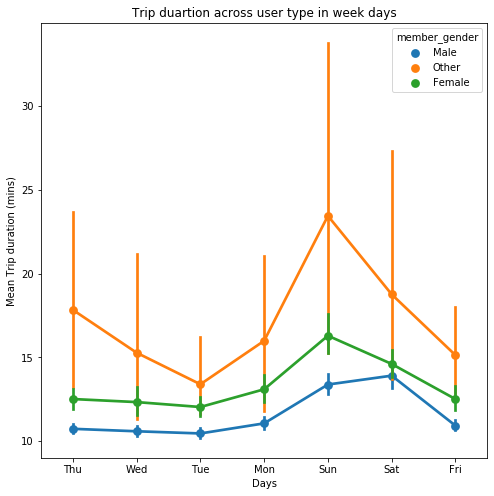

In [29]:
fig = plt.figure(figsize = [8,8])
sb.pointplot(data = df, x = 'start_day', y = 'duration_min', hue = 'member_gender')
plt.title('Trip duartion across user type in week days')
plt.ylabel('Mean Trip duration (mins)')
plt.xlabel('Days')
plt.show();

Others and females have have greater duration than males which might be due to driving slower than Males

Alsofrom this graph we conclude that the trip duration increase in holidays which might be beacause customers go in picnics or driving slowly as there is no need for rush for jobs

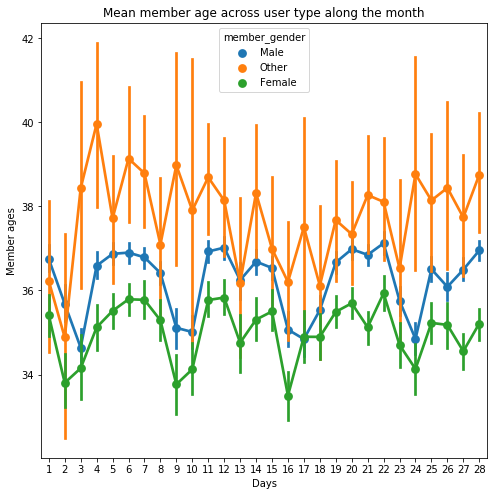

In [30]:
fig = plt.figure(figsize = [8,8])
sb.pointplot(data = df, x = 'day', y = 'member_age', hue = 'member_gender')
plt.title('Mean member age across user type along the month')
plt.ylabel('Member ages')
plt.xlabel('Days')
plt.show();

Females have the least mean ages Than others and Males in Using bikes

In [ ]:
!jupyter nbconvert Exploratory-notebook.ipynb --to slides --post serve --no-input --no-prompt